# Lab1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#General plot for b and c
def plot_(list_L, epochs, list_W, label = ""):
    plt.figure(figsize = (12,4))
    plt.subplot(1,2,1)
    plt.title("epochs vs. Log(L)" + label)
    plt.plot(range(epochs),np.log(list_L), '-')
    plt.xlabel("epochs")
    plt.ylabel("log(L)")
    plt.subplot(1,2,2)
    plt.title("epochs vs. W"+ label)
    list_W = np.array(list_W)
    for i in range(5):
        plt.plot(range(epochs),list_W[:,i], '-', label = 'w_'+str(i+1))
    plt.xlabel("epochs")
    plt.ylabel("value of element in W")
    plt.legend()
    plt.show()


In [2]:
X =np.array([[1,-2,-1,-1,1],[2, -1, 2, 0, -2],[-1, 0, 2, 2, 1]])
Y = np.array([-7,-1,-1])
W0 = np.array([0,0,0,0,0]).T
u = 0.02
epochs = 200

### Lab1 (b)

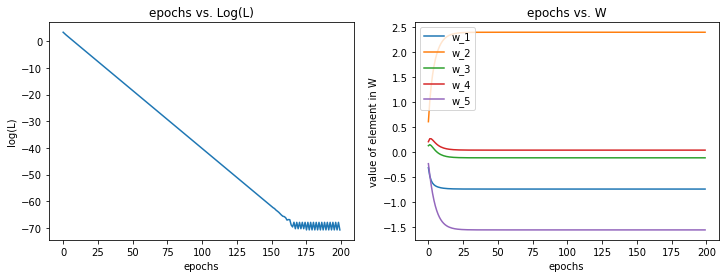

In [3]:
W = W0
list_W = []
list_L = []
for i in range(epochs):
    W = W - X.T @ (2*u*(X@W - Y))
    L = sum((X@W - Y)**2)
    list_L.append(L)
    list_W.append(W)
plot_(list_L, epochs, list_W, label = "")

## (c)

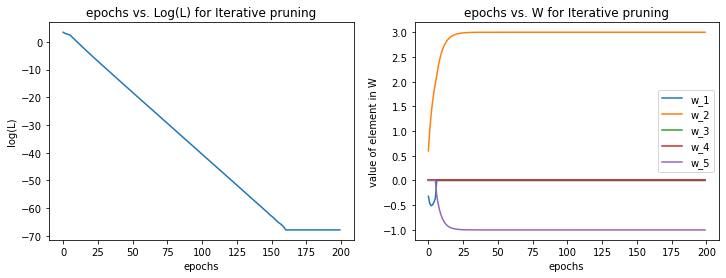

In [4]:
def do_c(X,Y,W0,u,epochs):
    W = W0
    list_W = []
    list_L = []
    for i in range(epochs):
        W = W - X.T @ (2*u*(X@W - Y))
        sort_W = np.sort(np.abs(W))[:3]
        for i in range(5):
            if abs(W[i]) in sort_W:
                W[i] = 0
        L = sum((X@W - Y)**2)
        list_L.append(L)
        list_W.append(W)
    plot_(list_L, epochs, list_W, label = " for Iterative pruning")
do_c(X,Y,W0,u,epochs)

### (d)

In [5]:
W = np.array([1,2,3,-1,-2,0,0])
np.sign(W)

array([ 1,  1,  1, -1, -1,  0,  0])

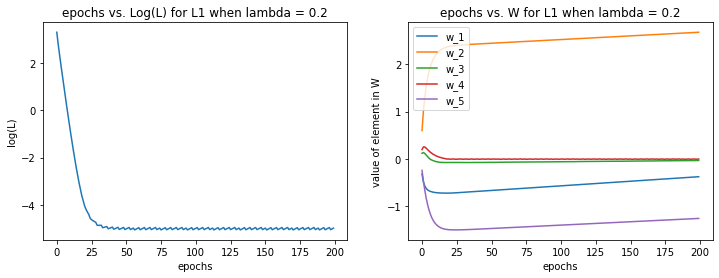

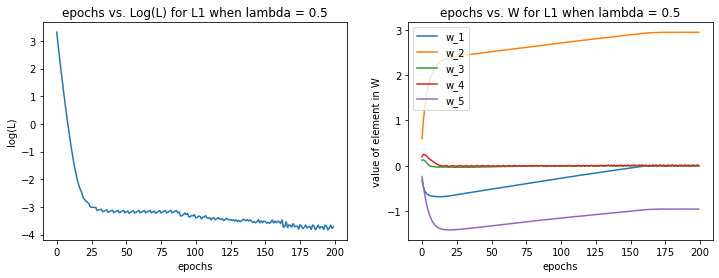

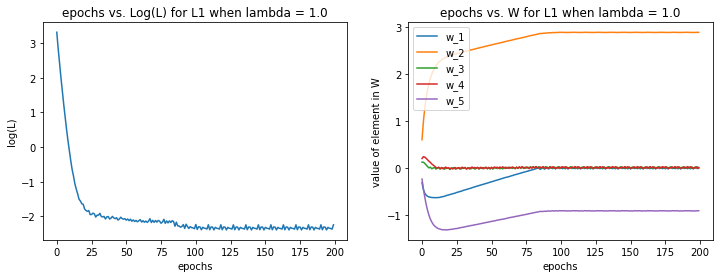

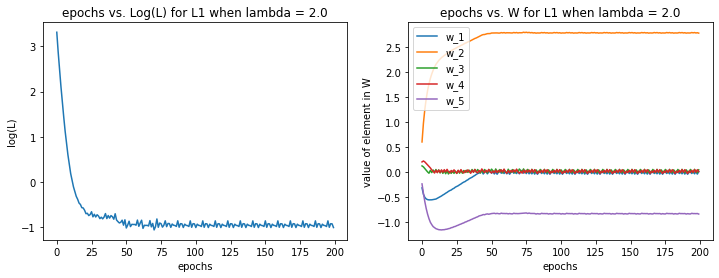

In [6]:
def do_d(X,Y,W0,u,epochs):
    for lambda_ in [0.2, 0.5, 1.0, 2.0]:
        W = W0
        list_L = []
        list_W = []
        epochs = 200
        for i in range(epochs):
            W = W - u*(2* X.T@((X@W - Y))+ lambda_* np.sign(W))
            L = sum((X@W - Y)**2)
            list_L.append(L)
            list_W.append(W)
        plot_(list_L, epochs, list_W, label = " for L1 when lambda = " + str(lambda_) )
do_d(X,Y,W0,u,epochs)

### (e)

In [7]:
def proxL1(lambda_,W):
    proxl1 = []
    for theta in W:
        if theta > lambda_:
            proxl1.append(theta -lambda_)
        elif theta < -lambda_:
            proxl1.append(theta + lambda_)
        else:
            proxl1.append(0)
    return np.array(proxl1) 

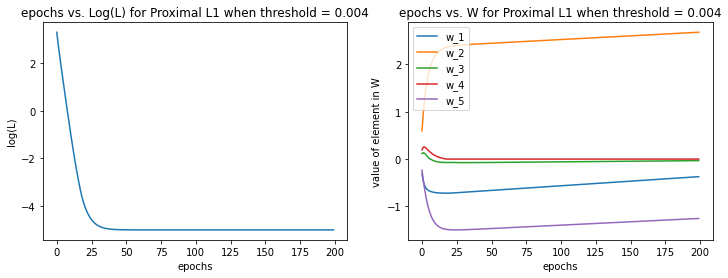

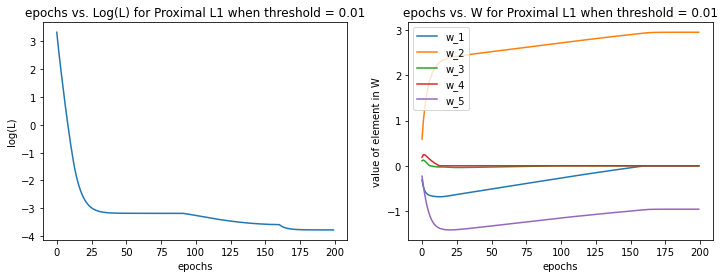

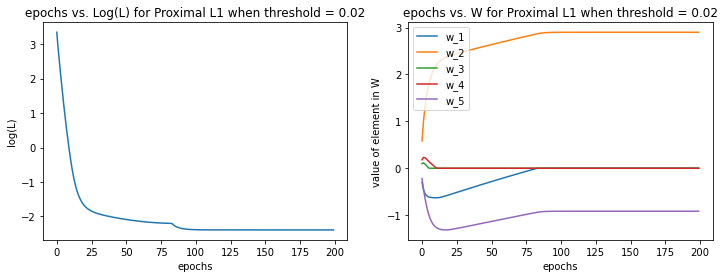

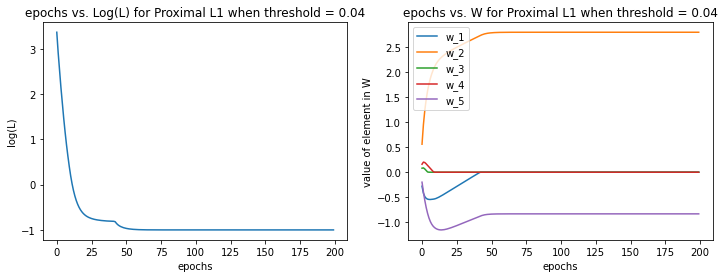

In [8]:
def do_e(X,Y,W0,u,epochs):
    for lambda_ in [0.2, 0.5, 1.0, 2.0]:
        W = W0
        list_L = []
        list_W = []
        for i in range(epochs):
            W = W - u*(2*X.T@(X@W - Y))
            W = proxL1(u*lambda_,W)
            L = sum((X@W - Y)**2)
            list_L.append(L)
            list_W.append(W)
        plot_(list_L, epochs, list_W, label = " for Proximal L1 when threshold = " + str(lambda_*u) )
do_e(X,Y,W0,u,epochs)

### (f)

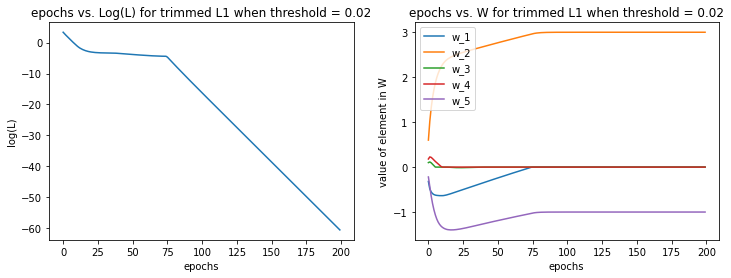

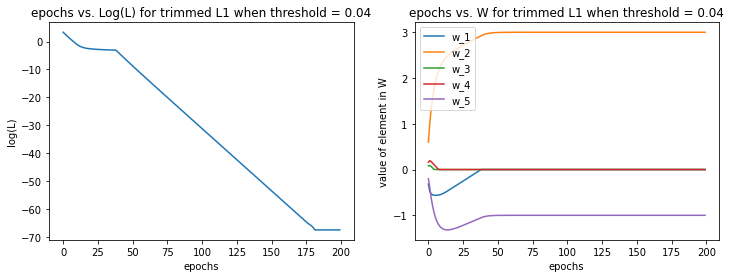

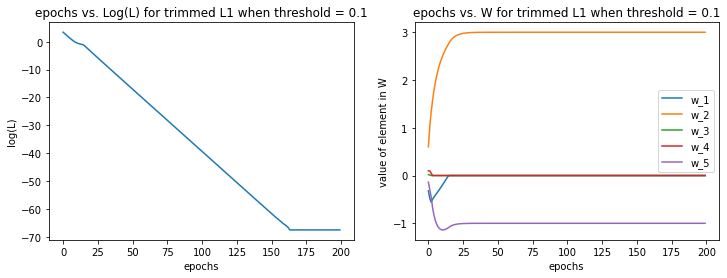

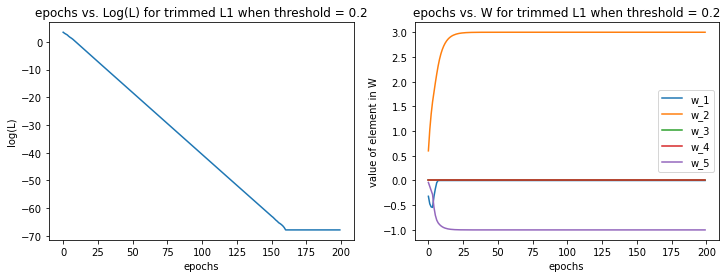

In [9]:
def do_f(X,Y,W0,u,epochs):
    for lambda_ in [1.0, 2.0, 5.0, 10.0]:
        W = W0
        list_L = []
        list_W = []
        epochs = 200
        for i in range(epochs):
            W = W - u*(2*X.T@(X@W - Y))
            index_min = np.argsort(abs(W))[:3]
            W[index_min] = proxL1(u*lambda_, W[index_min])
            L = sum((X@W - Y)**2)
            list_L.append(L)
            list_W.append(W)
        plot_(list_L, epochs, list_W, label = " for trimmed L1 when threshold = " + str(lambda_*u) )
do_f(X,Y,W0,u,epochs)

# Bonus

In [10]:
X_new =np.array([[1,-2,-1,-1,1],[2, -1, 2, 0, -2]])
Y_new = np.array([-7,-1])
W0 = np.array([0,0,0,0,0]).T
u = 0.02
epochs = 200

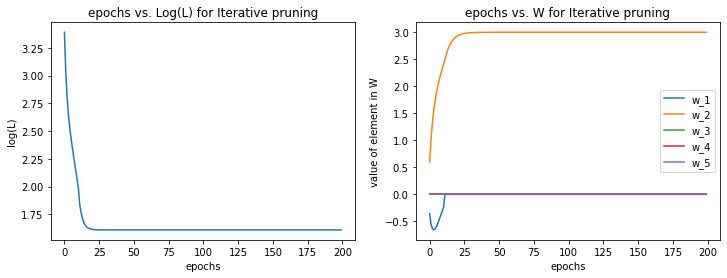

In [11]:
do_c(X_new,Y_new,W0,u,epochs)

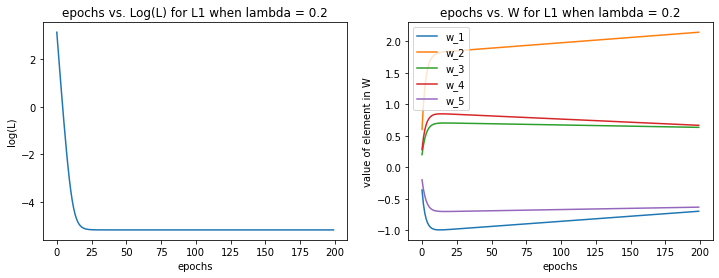

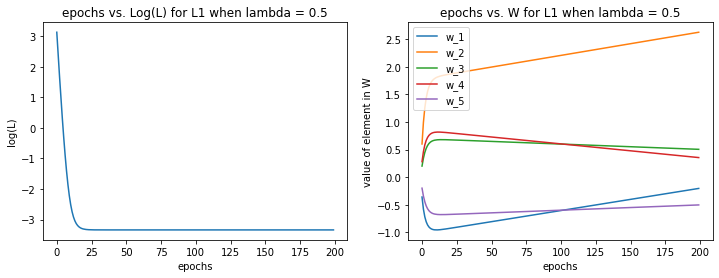

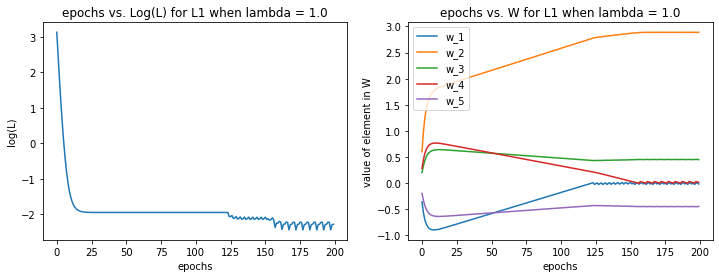

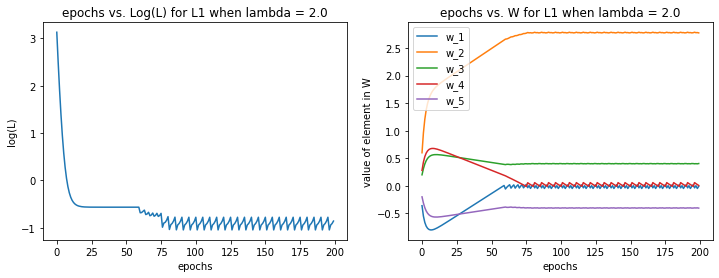

In [12]:
do_d(X_new,Y_new,W0,u,epochs)

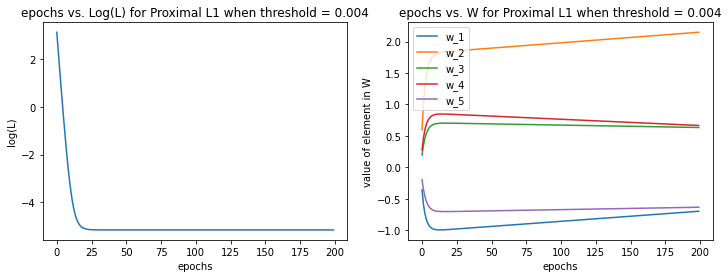

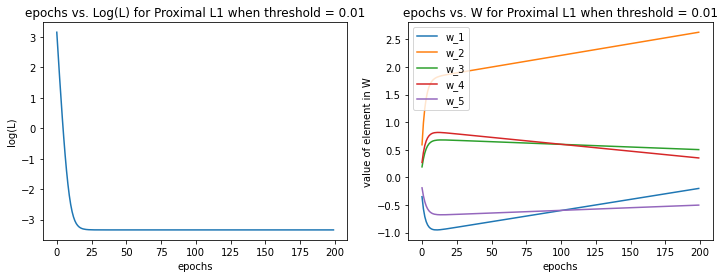

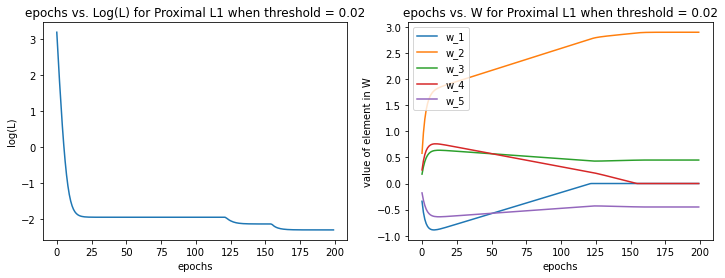

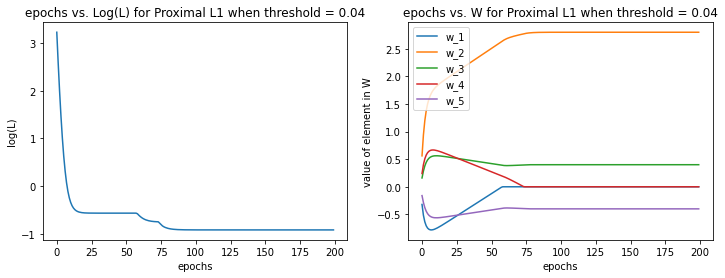

In [13]:
do_e(X_new,Y_new,W0,u,epochs)

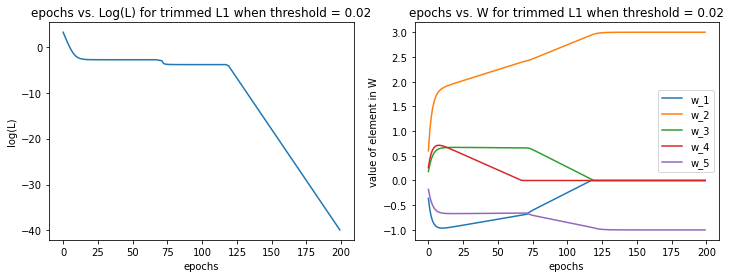

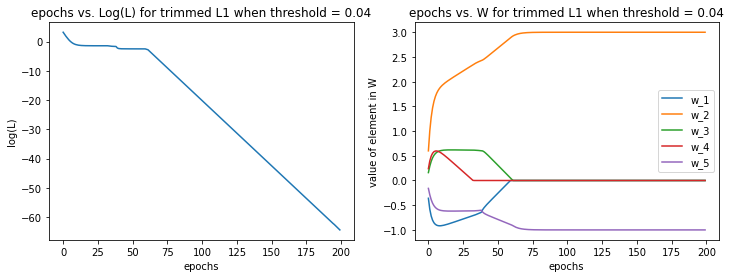

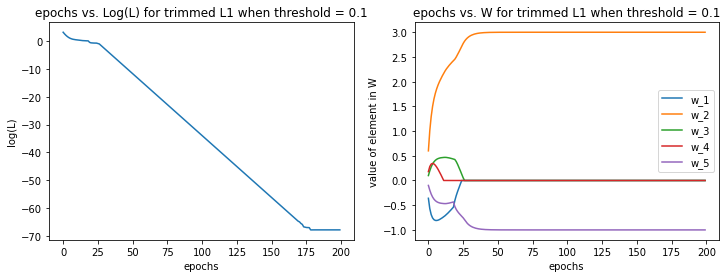

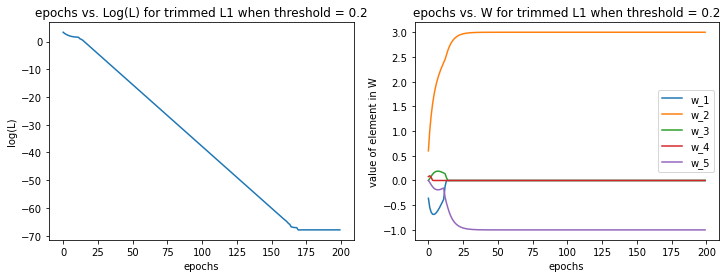

In [14]:
do_f(X_new,Y_new,W0,u,epochs)